In [105]:
print("STOCHASTIC GRADIENT")

STOCHASTIC GRADIENT


$$Gradient\ descent\ is\ an\ optimiazation\ algorithm\ to\ find\ minimum\ of\ a\ cost\ function.$$

$$ \underline {STOCHASTIC\ GRADIENT\ DESCENT}\ \\ Stochastic\ gradient\ descent\ 
involves\ the\ evaluation\ of\ each\ set\ but\ one\ at\ a\ time\\ \underline {Advantages}\\ 1.Fast\  processing\ 
speed\\ \underline{Disadvantages}\\ 1.lower\ computational\ efficiency$$

In [106]:
import numpy as np
import matplotlib.pyplot as plt

$$ \underline{Stochastic\ Gradient\ Descent:}\ a\ single,\ random\ observation\ in\ the\ training\ data\ is\ selected\ at\ each\ step.\\ 
This\ algorithm\ is\ very\ fast,\ only\ needing\ to\ perform\ calculations\ on\ a\ single\ point\ at\ a\ time.\ However,\ it\\
is\ erratic\ and\ may\ select\ points\ from\ all\ over\ the\ place,\ never\ stopping\ at\ a\ truly\ accurate\ solution.\ Instead,\
it\\ approaches\ the\ minimum\ on\ average.\ That\ being\ said,\ this\ algorithm\ is\ much\ more\ likely\ to\ find\ the\ global\ maximum.\\
Some\ of\ the\ erratic\ nature\ of\ the\ algorithm\ can\ be\ solved\ by\ using\ a\ learning\ schedule\ that\\ slowly\ reduces\ the\ learning\ 
rate\ so\ that\ it\ can\ settle\ on\ a\ more\ accurate\ solution.\\
Costfunction->\ f(x)= \frac {1}2n \sum_{x=i}^n (Y'-y)^2\\ Where\ n=number\ of\ items,\ Y'=predicted\ value\ of\ y,\ y=actual\ value\ of\  Y$$

In [113]:
#Get gradient by doing the derivative of the cost function
def gradient(x,y,theta):
    m=len(y)
    sum=0
    for i in range(m):
        sum+=(-1)*(1/m*(np.sum(np.square((y[i]-2*x[i]))-theta)))
    return sum

Values of cost_function:  [46.54852864 28.19428767 13.71647345  8.00873685  5.1247781   2.65640024
  2.02261515  1.51596993  1.16476529  1.00348844]


Text(0, 0.5, 'Cost')

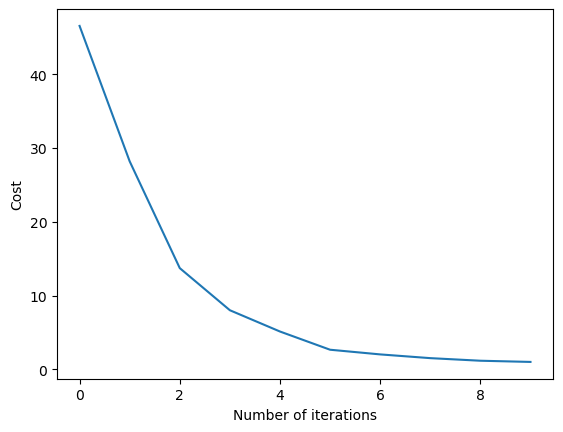

In [115]:
import numpy as np

def sgd(gradient, x, y, start, learn_rate=0.1, batch_size=1, n_iter=50,tolerance=1e-06, dtype="float64", random_state=None):

    # Setting up the data type for NumPy arrays
    dtype_ = np.dtype(dtype)
    
    #create an array filled with zeros 
    cost_history = np.zeros(iterations)
    
    # Converting x and y to NumPy arrays
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    n_obs = x.shape[0]
    
    if n_obs != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]

    # Initializing the random number generator
    seed = None if random_state is None else int(random_state)
    rng = np.random.default_rng(seed=seed)

    # Initializing the values of the variables
    vector = np.array(start, dtype=dtype_)

    # Setting up and checking the learning rate
    learn_rate = np.array(learn_rate, dtype=dtype_)
    if np.any(learn_rate <= 0):
        raise ValueError("'learn_rate' must be greater than zero")

    # Setting up and checking the size of minibatches
    batch_size = int(batch_size)
    if not 0 < batch_size <= n_obs:
        raise ValueError(
            "'batch_size' must be greater than zero and less than "
            "or equal to the number of observations"
        )
        
    # Setting up and checking the tolerance
    tolerance = np.array(tolerance, dtype=dtype_)
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")

    # Performing the gradient descent loop
    for _ in range(n_iter):
        # Shuffle x and y
        rng.shuffle(xy)

        # Performing minibatch moves
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]

            # Recalculating the difference
            grad = np.array(gradient(x_batch, y_batch, vector), dtype_)
            diff = -learn_rate * grad

            # Checking if the absolute difference is small enough
            if np.all(np.abs(diff) <= tolerance):
                break

            # Updating the values of the variables
            vector += diff
            cost_history[start]= vector
    return vector if vector.shape else vector.item()

#initialise values
x=np.random.rand(100,1)
y=2*x+ np.random.rand()
#call the function
sgd(gradient, x, y, start=1,learn_rate=0.1, batch_size=1, n_iter=50,tolerance=1e-06, dtype="float64", random_state=None)

print("Values of cost_function: ",cost_history)
plt.plot(range(10),cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')


$$From\ the\ above\ graph,\ We\  can\ state\  that\ the\ cost\ function\ minimizes\ with\ increase\ in\ iterations.\ 
$$